### Posterior PDFs

#### Starry Night

50 stars were observed in a 10 deg$^2$ patch of the sky, then assuming a Poissonian distribution for the number of stars observed per 10deg$^2$ of sky. Then the number of stars per 10 deg$^2$ of sky is $T=10S$ where $S$ is the number of stars per deg$^2$. The posterior probability density function (PDF) for $T$ is given by

\begin{align}
P(T|n=50) = \frac{P(n=50|T)P(T)}{P(n=50)}
\end{align}
where
\begin{align}
    P(n=50|T) &= \frac{e^{-T}T^n}{n!} \\
    P(T) &= \frac{1}{300}\Theta (x)\Theta (300-x) \\
    P(n=50) &= \int_{0}^{300} P(n=50|T)P(T)dT
\end{align}
therefore,
\begin{align}
    P(T|n=50) = \left. \frac{e^{-T}T^n}{n!} \middle/ \int_{0}^{300} \frac{e^{-T}T^n}{n!}dT  \right. .
\end{align}

The integral
\begin{align}
    \int_{0}^{300} e^{-T}T^ndT \approx n!
\end{align}
by comparing to the integral definition of the factorial function
\begin{align}
    \int_{0}^{\infty} e^{-T}T^ndT = n!
\end{align}
So the posterior PDF for $T$ becomes
\begin{align}
    P(T|n=50) = \left. \frac{e^{-T}T^n}{n!} \right.
\end{align}
for $T\in(0,300)$ and $n=50$. The posterior PDF for $S$ is given by the substitution of $T=10S$ and restricting $S$ such that $S\in (0,30)$
\begin{align}
    P(S|n=50) = \left. \frac{e^{-10S}(10S)^n}{n!} \right.
\end{align}

Plots of the posterior PDFs for $T$ and $S$ are shown below

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

In [2]:
# Posible values of  T and S
t_values = np.linspace(0, 300, 10000)
s_values = np.linspace(0, 30, 10000)

# Posterior of T given in the equation above
def posterior(x):
    return np.exp(-1.0 * x) * x**50 / np.math.factorial(50)

# Calculate the T and S posteriors
t_posterior = posterior(t_values)
s_posterior = posterior(10* s_values)

<Figure size 432x288 with 0 Axes>

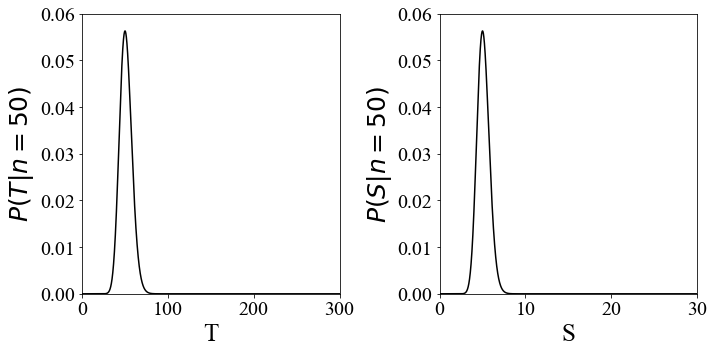

In [8]:
# Create plot of the posteriors of T and S
plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(t_values, t_posterior, color="k", label="Data")

ax1.set_xlabel('T', fontsize=25)
ax1.set_ylabel('$P(T|n=50)$', fontsize=25)

ax1.tick_params(labelsize=20)

ax1.set_xlim([0.0, 300.0])
ax1.set_ylim([0.0, 0.06])

ax2.plot(s_values, s_posterior, color="k", label="Data")

ax2.set_xlabel('S', fontsize=25)
ax2.set_ylabel('$P(S|n=50)$', fontsize=25)

ax2.tick_params(labelsize=20)

ax2.set_xlim([0.0, 30.0])
ax2.set_ylim([0.0, 0.06])

fig.tight_layout(pad=1.0)

The mean is calculated by performing a simple numerical integration
\begin{align}
    \int_{0}^{30} \frac{e^{-10S}(10S)^n}{n!} S dS \approx \sum_{i=0}^{N} \frac{e^{-10S}(10S)^n}{n!} \cdot S \cdot \Delta S
\end{align}
where $N$ is the total number of points at which $S$ is evaluated, and $\Delta S$ is the incremental change in $S$ between two evaluation points. This calculation is performed below.

In [9]:
t_delta = t_values[1] - t_values[0] 
t_mean = np.sum(t_posterior * t_values * t_delta)
print("The mean of T is {:.2f}.".format(t_mean))

s_delta = s_values[1] - s_values[0]
s_mean = np.sum(s_posterior * s_values * s_delta * 10.0)
print("The mean of S is {:.2f}.".format(s_mean))

The mean of T is 51.00.
The mean of S is 5.10.


To calculate the mode, consider
\begin{align}
    \frac{d}{dT}\left[ \mathrm{ln}(P(T|n)) \right] &= \frac{d}{dp}\left[ \mathrm{ln}(e^{-T}T^n) \right]\\
    &= \frac{d}{dp}\left[ -T + n \mathrm{ln}(T) \right] \\
    &= \frac{n}{T_{mode}}-1 = 0
\end{align}
therefore,
\begin{align}
    T_{mode} &= n = 50 \\
    S_{mode} &= T_{mode}/10 = 5.
\end{align}

The mode was also approximated by finding the point where the posterior PDF has a maximal value and gave a value of 5.0. It was expected that the mean and mode of $S$ are not equal, as the posterior PDF is not symmetric. The mode can be estimated directly from the posterior as shown below.

In [10]:
t_mode = t_values[np.argmax(t_posterior)]
print("The mode of T is {:.2f}.".format(t_mode))

s_mode = s_values[np.argmax(s_posterior)]
print("The mode of S is {:.2f}.".format(s_mode))

The mode of T is 50.02.
The mode of S is 5.00.


To incorporate additional information from a measurement of $S=7.7\pm0.3$ where the error is Gaussian, a new posterior PDF is calculated using the previously calculated posterior as the new prior and the new likelihood, which is the new measurement of $S$. The new posterior is then
\begin{align}
    P(S|n,\mu,\sigma) = \left.\frac{e^{-10S}(10S)^{50}}{50!} \cdot \frac{1}{\sqrt{2\pi}\cdot 0.3}e^{-\frac{\left( S - 7.7 \right)^2}{2\cdot 0.3^2}} \middle/ \int_{0}^{30} \frac{e^{-10S}(10S)^{50}}{50!} \cdot \frac{1}{\sqrt{2\pi}\cdot 0.3}e^{-\frac{\left( S - 7.7 \right)^2}{2\cdot 0.3^2}} dS \right.
\end{align}
where $n, \mu,$ and $\sigma$ have been input as 50, 7.7, and 0.3 respectively. The integral in the denominator gives the normalisation of the posterior PDF. Plots of this distribution for $T=10S$ and $S$ are shown below

In [11]:
# Gaussian function
def my_gaussian(x, mean, error):
    return (1 / (np.sqrt(2*np.pi) * error)) * np.exp(-np.power((x - mean), 2)/(2 * error**2))


# Update posterior function with S = T/10 substitution
def updated_posterior(measurement_type, x, mean, error):
    delta = x[1]-x[0]
    if measurement_type == 'T':
        return posterior_calculation(x, x/10.0, delta, mean, error)
    elif measurement_type == 'S':
        return posterior_calculation(x*10.0, x, delta, mean, error)

# Posterior calculation using Bayes Theorem
def posterior_calculation(x1, x2, x_diff, mean, error):
    numerator = posterior(x1) * my_gaussian(x2, mean, error)
    integral = np.sum(numerator * x_diff)
    return numerator / integral

In [12]:
s_measurement_mean = 7.7
s_measurement_error = 0.3

In [13]:
t_posterior = updated_posterior('T', t_values, s_measurement_mean, s_measurement_error)
s_posterior = updated_posterior('S', s_values, s_measurement_mean, s_measurement_error)

<Figure size 432x288 with 0 Axes>

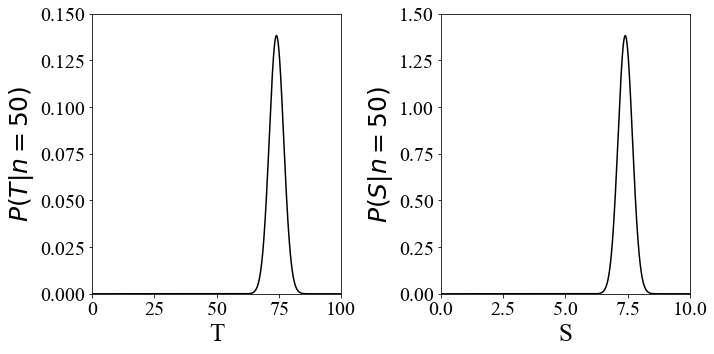

In [16]:
# Create plot of the posteriors of T and S
plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(t_values, t_posterior, color="k", label="Data")

ax1.set_xlabel('T', fontsize=25)
ax1.set_ylabel('$P(T|n=50)$', fontsize=25)

ax1.tick_params(labelsize=20)

ax1.set_xlim([0.0, 100.0])
ax1.set_ylim([0.0, 0.15])

ax2.plot(s_values, s_posterior, color="k", label="Data")

ax2.set_xlabel('S', fontsize=25)
ax2.set_ylabel('$P(S|n=50)$', fontsize=25)

ax2.tick_params(labelsize=20)

ax2.set_xlim([0.0, 10.0])
ax2.set_ylim([0.0, 1.5])

fig.tight_layout(pad=1.0)

The mean and mode were calculated for each of these distributions are are shown below. As before, it was expected that the mean and mode for each distribution would not be equal, due to the asymmetry in the posterior PDF.

In [17]:
t_delta = t_values[1] - t_values[0] 
t_mean = np.sum(t_posterior * t_values * t_delta)
print("The mean of T is {:.4f}.".format(t_mean))

t_mode = t_values[np.argmax(t_posterior)]
print("The mode of T is {:.4f}.".format(t_mode))
print()

s_delta = s_values[1] - s_values[0]
s_mean = np.sum(s_posterior * s_values * s_delta * 10.0)
print("The mean of S is {:.4f}.".format(s_mean))

s_mode = s_values[np.argmax(s_posterior)]
print("The mode of S is {:.4f}.".format(s_mode))

The mean of T is 74.0835.
The mode of T is 74.0774.

The mean of S is 74.0835.
The mode of S is 7.4077.
